In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('titanic_train.csv', encoding='utf-8', sep=',', index_col='PassengerId')

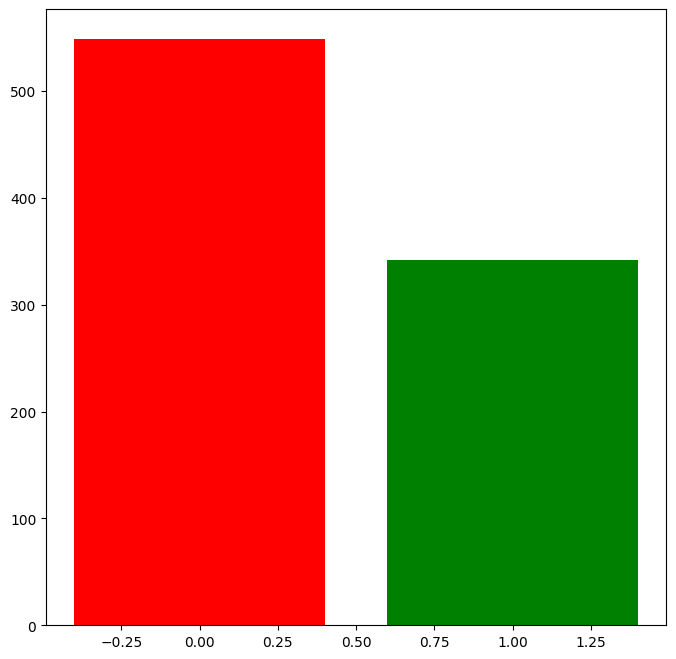

In [3]:
plt.figure(figsize=(8,8))
plt.bar(train_data.Survived.value_counts().index,train_data.Survived.value_counts(),color=['red', 'green'])
plt.show()

целевые классы не сбалансированы, поэтому в будущем придется воспользоваться балансировкой классов

In [4]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.shape

(891, 11)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
train_data.Name.unique().shape

(891,)

Столбец с именами удаляем, т.к. он бесполезный

In [8]:
train_data.drop('Name', axis=1, inplace=True)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


Видим пропуски в стобцах Age, Cabin и Embarked. Age буду заполнять медианой, Cabin - Unknown, а Embarked - наиболее встречающимся значением в столбце(там всего два пропуска, поэтому я думаю что не совсем критично)

In [10]:
train_data.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [11]:
train_data.Cabin.fillna('Unknown',inplace=True)

In [12]:
train_data.Cabin.value_counts()

Cabin
Unknown        687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

In [13]:
train_data.Ticket.value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

Видим значения, которые встречаются лишь один раз. Поэтому закодируем их еще до разделения выборки. С остальными значениями проблем нет.

In [14]:
cabin_encoder = LabelEncoder()
ticket_encoder = LabelEncoder()

train_data.Cabin = cabin_encoder.fit_transform(train_data.Cabin)
train_data.Ticket = ticket_encoder.fit_transform(train_data.Ticket)


In [15]:
train_data, test_data = train_test_split(train_data, test_size=0.2, random_state=23) # так же делит целевые классы в одинаковых пропорциах(я проверил)

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 152 to 596
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       577 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Ticket    712 non-null    int32  
 7   Fare      712 non-null    float64
 8   Cabin     712 non-null    int32  
 9   Embarked  711 non-null    object 
dtypes: float64(2), int32(2), int64(4), object(2)
memory usage: 55.6+ KB


In [17]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 728 to 830
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  179 non-null    int64  
 1   Pclass    179 non-null    int64  
 2   Sex       179 non-null    object 
 3   Age       137 non-null    float64
 4   SibSp     179 non-null    int64  
 5   Parch     179 non-null    int64  
 6   Ticket    179 non-null    int32  
 7   Fare      179 non-null    float64
 8   Cabin     179 non-null    int32  
 9   Embarked  178 non-null    object 
dtypes: float64(2), int32(2), int64(4), object(2)
memory usage: 14.0+ KB


In [18]:
train_data.Embarked.fillna(train_data.Embarked.mode()[0], inplace=True)
test_data.Embarked.fillna(test_data.Embarked.mode()[0], inplace=True)

In [19]:
train_data.Age.fillna(train_data.Age.median(axis=0), inplace=True)
test_data.Age.fillna(test_data.Age.median(axis=0), inplace=True)

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 152 to 596
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Ticket    712 non-null    int32  
 7   Fare      712 non-null    float64
 8   Cabin     712 non-null    int32  
 9   Embarked  712 non-null    object 
dtypes: float64(2), int32(2), int64(4), object(2)
memory usage: 55.6+ KB


In [21]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 728 to 830
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  179 non-null    int64  
 1   Pclass    179 non-null    int64  
 2   Sex       179 non-null    object 
 3   Age       179 non-null    float64
 4   SibSp     179 non-null    int64  
 5   Parch     179 non-null    int64  
 6   Ticket    179 non-null    int32  
 7   Fare      179 non-null    float64
 8   Cabin     179 non-null    int32  
 9   Embarked  179 non-null    object 
dtypes: float64(2), int32(2), int64(4), object(2)
memory usage: 14.0+ KB


In [22]:
train_data.Sex.unique()

array(['female', 'male'], dtype=object)

In [23]:
train_data.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [24]:
sex_encoder = LabelEncoder()
embark_encoder = LabelEncoder()


train_data.Sex = sex_encoder.fit_transform(train_data.Sex)
train_data.Embarked = embark_encoder.fit_transform(train_data.Embarked)
test_data.Sex = sex_encoder.transform(test_data.Sex)
test_data.Embarked = embark_encoder.transform(test_data.Embarked)

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 152 to 596
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    int32  
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Ticket    712 non-null    int32  
 7   Fare      712 non-null    float64
 8   Cabin     712 non-null    int32  
 9   Embarked  712 non-null    int32  
dtypes: float64(2), int32(4), int64(4)
memory usage: 50.1 KB


In [26]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 728 to 830
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  179 non-null    int64  
 1   Pclass    179 non-null    int64  
 2   Sex       179 non-null    int32  
 3   Age       179 non-null    float64
 4   SibSp     179 non-null    int64  
 5   Parch     179 non-null    int64  
 6   Ticket    179 non-null    int32  
 7   Fare      179 non-null    float64
 8   Cabin     179 non-null    int32  
 9   Embarked  179 non-null    int32  
dtypes: float64(2), int32(4), int64(4)
memory usage: 12.6 KB


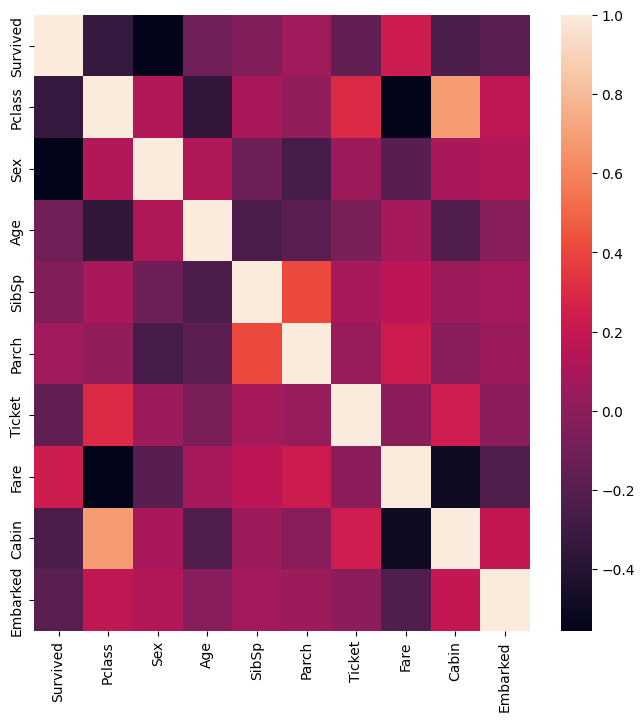

In [27]:
corr_matrix = train_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix)
plt.show()

In [28]:
corr_matrix # я немного дальтоник и мне проще судить по матрице чисел, а не матрице нагрева

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,1.000000,-0.334723,-0.546218,-0.103967,-0.046898,0.067563,-0.161202,0.232330,-0.247198,-0.186803
Pclass,-0.334723,1.000000,0.128124,-0.352709,0.092372,0.017221,0.300854,-0.555802,0.684488,0.174720
Sex,-0.546218,0.128124,1.000000,0.116271,-0.123788,-0.263530,0.050847,-0.191701,0.092046,0.126321
Age,-0.103967,-0.352709,0.116271,1.000000,-0.239826,-0.185985,-0.066259,0.086636,-0.222697,-0.022278
SibSp,-0.046898,0.092372,-0.123788,-0.239826,1.000000,0.409810,0.084179,0.163141,0.047107,0.071097
Parch,0.067563,0.017221,-0.263530,-0.185985,0.409810,1.000000,0.034996,0.223795,-0.022581,0.047798
Ticket,-0.161202,0.300854,0.050847,-0.066259,0.084179,0.034996,1.000000,-0.010543,0.236295,-0.009870
Fare,0.232330,-0.555802,-0.191701,0.086636,0.163141,0.223795,-0.010543,1.000000,-0.500087,-0.229361
Cabin,-0.247198,0.684488,0.092046,-0.222697,0.047107,-0.022581,0.236295,-0.500087,1.000000,0.186666
Embarked,-0.186803,0.174720,0.126321,-0.022278,0.071097,0.047798,-0.009870,-0.229361,0.186666,1.000000


Очевидным фактом является то, что пол влияет на выживаемость как можно заметить по матрице корреляции. Дальше идет класс билета, плата за проезд(стоимость билета), кабина, порт высадки, номер билета, количество родителей/детей на борту, возраст и количество родственников на борту.

In [29]:
train_data.to_csv('cleared_train_data.csv', encoding='utf-8', sep=',')
test_data.to_csv('cleared_test_data.csv', encoding='utf-8', sep=',')

In [34]:
data = pd.concat([train_data,test_data],axis=0)
data['family_size'] = data.SibSp + data.Parch + 1

<Axes: xlabel='family_size', ylabel='count'>

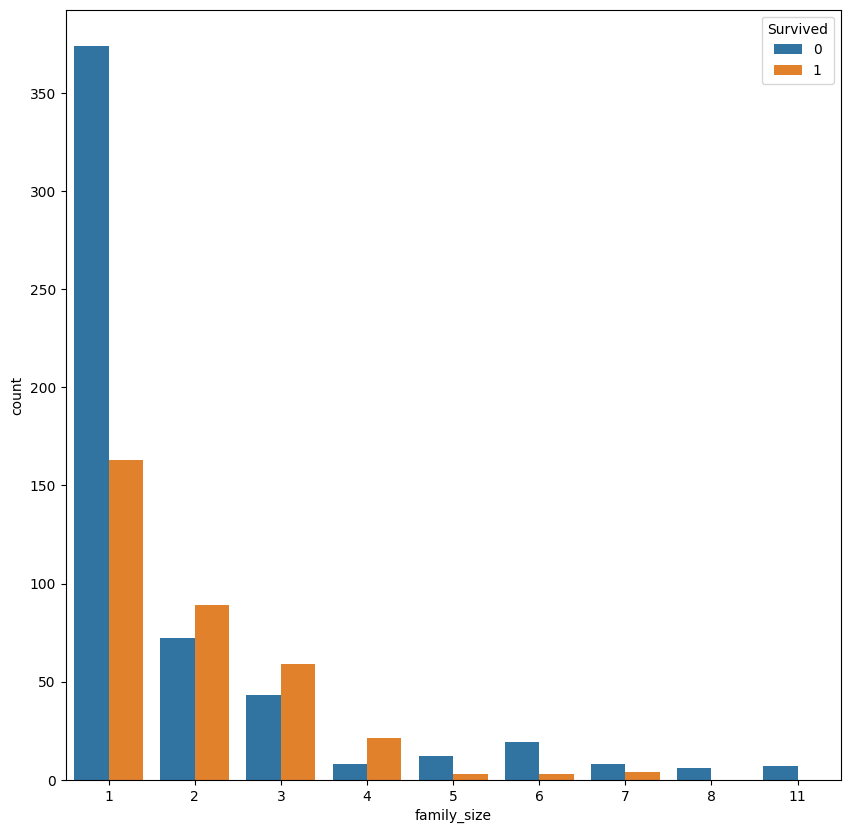

In [40]:
plt.figure(figsize=(10,10))
sns.countplot(data, x = 'family_size', hue = 'Survived')

Колонка слева - размер семьи. Колонка справа - процент выживших

In [51]:
data.groupby('family_size').Survived.mean()

family_size
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

На основе графика и матрицы можно сделать вывод о том, что чаще всего выживают люди с семьей в размере 4 человек. Дальше 3, 2, 7, 1, 5, 6 и вовсе не выжили люди с размером семьи равной 8 и 9.

В ходе работы данного файла были заполнены пропуски в стобцах Age, Cabin и Embarked. Построен график баров для целевых классов, на котором видно, что классы неслабансированы и в будущем при обучении моделей надо будет учитывать этот факт. Стобец Name был удален по причине того, что у всех имена разные и он бесполезен. Отобразили карту нагрева(матрицу корреляции), где подчеркнули факт того, что наиболее влияющим фактором для выживания является пол. Была разделена выборка на тренировочную и тестовую, а так же проверили как влияет размер семьи на выживаемость где в конечном итоге чаще всего выживали люди с размером семьи = 4 человек.